<a href="https://colab.research.google.com/github/trifarameliniaa/SKRIPSI/blob/main/Image_Segmentation_K_Means_Klastering_dan_Evaluasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

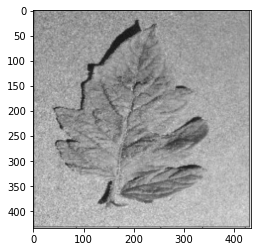

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('/content/FIG 4.png')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [ ]:
print(image.dtype, image.shape)

uint8 (434, 434, 3)


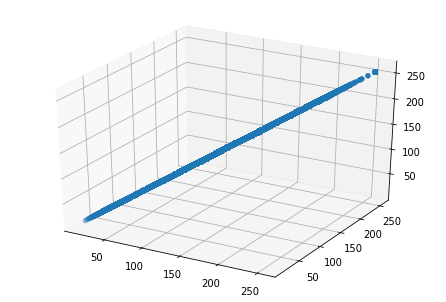

In [ ]:
# showing the RGB color scatter

r, g, b = cv2.split(image)
r = r.flatten()
g = g.flatten()
b = b.flatten()#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [ ]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
print(pixel_vals.dtype, pixel_vals.shape)

uint8 (188356, 3)


In [ ]:
# Convert to float type

Z = np.float32(pixel_vals)
print(Z.dtype, Z.shape)

float32 (188356, 3)


In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
print(label)

[[1]
 [6]
 [6]
 ...
 [2]
 [2]
 [2]]


In [ ]:
print(center)

[[125.497925 125.48464  125.50855 ]
 [ 95.8255    95.81114   95.82082 ]
 [205.62462  205.61272  205.61426 ]
 [171.66946  171.59016  171.64914 ]
 [145.07678  145.07106  145.08171 ]
 [186.20613  186.19814  186.20558 ]
 [ 46.841785  46.831783  46.83713 ]
 [158.93056  158.87283  158.90135 ]]


In [ ]:
# back convert data into integer 8-bit values

center = np.uint8(center)
center

array([[125, 125, 125],
       [ 95,  95,  95],
       [205, 205, 205],
       [171, 171, 171],
       [145, 145, 145],
       [186, 186, 186],
       [ 46,  46,  46],
       [158, 158, 158]], dtype=uint8)

In [ ]:
# back to cluster

segmented_data = center[label.flatten()]
segmented_data

array([[ 95,  95,  95],
       [ 46,  46,  46],
       [ 46,  46,  46],
       ...,
       [205, 205, 205],
       [205, 205, 205],
       [205, 205, 205]], dtype=uint8)

In [ ]:
# reshape data into the original image dimensions

segmented_image = segmented_data.reshape((image.shape))
segmented_image

array([[[ 95,  95,  95],
        [ 46,  46,  46],
        [ 46,  46,  46],
        ...,
        [ 46,  46,  46],
        [205, 205, 205],
        [205, 205, 205]],

       [[ 46,  46,  46],
        [ 46,  46,  46],
        [ 95,  95,  95],
        ...,
        [ 95,  95,  95],
        [205, 205, 205],
        [205, 205, 205]],

       [[ 95,  95,  95],
        [ 46,  46,  46],
        [ 95,  95,  95],
        ...,
        [ 95,  95,  95],
        [205, 205, 205],
        [205, 205, 205]],

       ...,

       [[125, 125, 125],
        [ 46,  46,  46],
        [ 46,  46,  46],
        ...,
        [ 95,  95,  95],
        [205, 205, 205],
        [205, 205, 205]],

       [[125, 125, 125],
        [ 46,  46,  46],
        [ 95,  95,  95],
        ...,
        [125, 125, 125],
        [205, 205, 205],
        [205, 205, 205]],

       [[125, 125, 125],
        [ 95,  95,  95],
        [186, 186, 186],
        ...,
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205]]

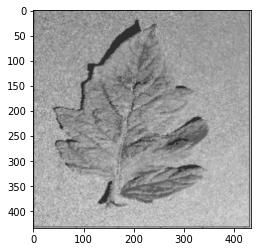

In [ ]:
# visualize the segmented image

plt.imshow(segmented_image)

In [ ]:
from PIL import Image
im = Image.fromarray(segmented_image)
im.save("outfile.jpeg")

In [ ]:
# PNSR (Peak Signal to Noise Ratio)
from math import log10, sqrt

def PSNR(original, compressed):
	mse = np.mean((original - compressed) ** 2)
	if(mse == 0): 
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr

def main():
	original = cv2.imread("/content/FIG 4.png")
	compressed = cv2.imread("/content/outfile.jpeg", 1)
	value = PSNR(original, compressed)
	print(f"PSNR value is {value} dB")
	
if __name__ == "__main__":
	main()

PSNR value is 33.70496322927343 dB
